# SPAM MAIL DETECTION

Importing the Required Libraries for the Project

In [35]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

Reading the dataset from the .csv file

In [4]:
spam_data = pd.read_csv("spam.csv", encoding='latin1')

Analyzing the dataset

In [5]:
spam_data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
spam_data.shape

(5572, 5)

In [7]:
spam_data.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [8]:
spam_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


Deleting the useless columns for the project

In [9]:
columns_drop = ["Unnamed: 2","Unnamed: 3","Unnamed: 4"]
spam_data = spam_data.drop(columns_drop,axis=1)

In [10]:
spam_data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
spam_data.shape

(5572, 2)

Reformatting the dataset

In [12]:
spam_data.columns = ["Target","Data"]

In [13]:
spam_data.head()

,Target,Data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
X = spam_data["Data"]
Y = spam_data["Target"]

In [15]:
X.shape

(5572,)

In [16]:
Y.shape

(5572,)

Encodding the data (Data Preprocessing)

Here 0 means it is Ham and 1 means it is a Spam

In [17]:
le = LabelEncoder()
Y = le.fit_transform(Y)

In [18]:
Y

array([0, 0, 1, ..., 0, 0, 0])

Converting text data into numerical form (feature extraction)

In [19]:
X.head()

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: Data, dtype: object

In [20]:
feature_extraction = TfidfVectorizer(min_df=1,stop_words="english",lowercase=True)

In [21]:
X = feature_extraction.fit_transform(X)

In [22]:
print(X)

  (0, 8026)	0.19609779550499865
  (0, 1051)	0.3509649021061901
  (0, 3494)	0.16470488207184114
  (0, 1994)	0.2964965675440533
  (0, 1701)	0.33503393550839805
  (0, 4349)	0.2964965675440533
  (0, 8227)	0.23740046706740073
  (0, 3534)	0.19387320529717864
  (0, 1703)	0.2964965675440533
  (0, 1271)	0.2625103008882829
  (0, 2271)	0.27179815735762314
  (0, 5741)	0.2745089285415426
  (0, 4224)	0.3509649021061901
  (1, 5369)	0.5465881710238072
  (1, 8134)	0.4316010362639011
  (1, 4192)	0.5236458071582338
  (1, 4385)	0.4082988561907181
  (1, 5343)	0.27211951321382544
  (2, 77)	0.23759715224911548
  (2, 1128)	0.1707825659976717
  (2, 6062)	0.1707825659976717
  (2, 7701)	0.12576907263059747
  (2, 7028)	0.1989696587085652
  (2, 6010)	0.1808417865094903
  (2, 6115)	0.16914304332607796
  :	:
  (5567, 5118)	0.2445888397614688
  (5567, 8202)	0.19074118816829963
  (5567, 2000)	0.185955090206136
  (5567, 5894)	0.19532744699307247
  (5567, 6062)	0.23098372602432177
  (5568, 2907)	0.6005703500933404
  (55

Splitting the data into training and testing

In [23]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=7,test_size=0.2)

In [24]:
print(X_train.shape)
print(X_test.shape)
print(X.shape)

(4457, 8404)
(1115, 8404)
(5572, 8404)


In [25]:
print(Y_train.shape)
print(Y_test.shape)
print(Y.shape)

(4457,)
(1115,)
(5572,)


Creating the logistic Regression model as this is best for the classification of 2 objects

In [26]:
Logistic_Model = LogisticRegression()

In [27]:
Logistic_Model.fit(X=X_train,y=Y_train)

LogisticRegression()

Prediction on the tranning data

In [28]:
train_data_prediction = Logistic_Model.predict(X_train)

In [29]:
training_accuracy = accuracy_score(Y_train,train_data_prediction)

In [30]:
print(f"The accuracy on training data is {training_accuracy}")

The accuracy on training data is 0.9706080323087278


Predicting on the testing data

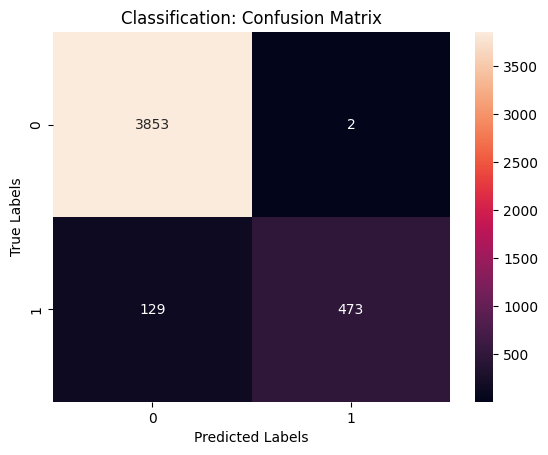

In [36]:
conf_matrix = confusion_matrix(Y_train, train_data_prediction)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Classification: Confusion Matrix")
plt.show()

In [32]:
test_data_prediction = Logistic_Model.predict(X_test)

In [33]:
test_accuracy = accuracy_score(Y_test,test_data_prediction)

In [34]:
print(f"The accuracy on test data is {test_accuracy}")

The accuracy on test data is 0.9497757847533632


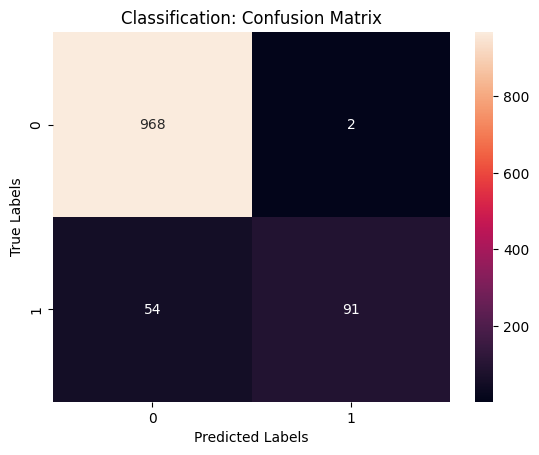

In [37]:
conf_matrix = confusion_matrix(Y_test, test_data_prediction)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Classification: Confusion Matrix")
plt.show()